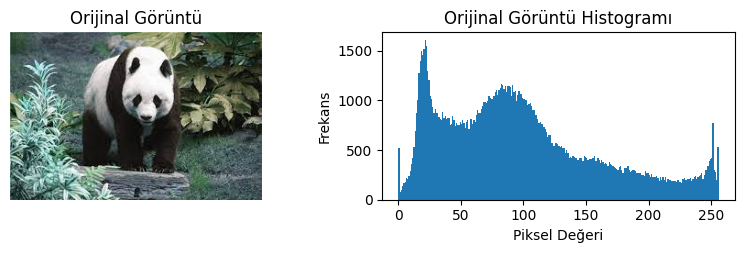

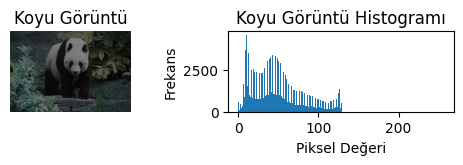

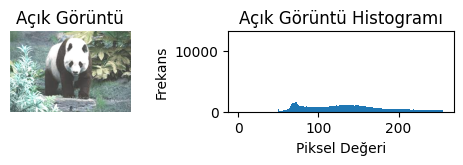

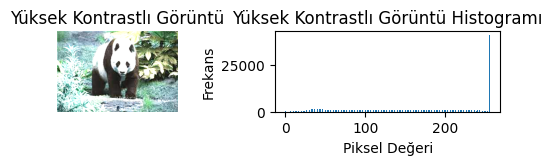

<Figure size 640x480 with 0 Axes>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Orijinal görüntüyü gri tonlamalı olarak yükleyin
resim = cv2.imread('picture1.jpg')

# Koyu görüntü oluşturmak için parlaklığı azaltın (negatif beta değil, düşük alpha kullanın)
koyu_resim = cv2.convertScaleAbs(resim, alpha=0.5, beta=0)

# Açık görüntü oluşturmak için parlaklığı artırın (düşük kontrast değil, yüksek beta kullanın)
acik_resim = cv2.convertScaleAbs(resim, alpha=1, beta=50)

# Yüksek kontrastlı görüntü için kontrastı artırın
yuksek_kontrast_resim = cv2.convertScaleAbs(resim, alpha=2, beta=0)

# Düşük kontrastlı görüntü için kontrastı azaltın
dusuk_kontrast_resim = cv2.convertScaleAbs(resim, alpha=0.5, beta=0)

# Histogram çizme fonksiyonu
def plot_histogram(image, title):
    plt.hist(image.ravel(), 256, [0, 256])
    plt.title(title)
    plt.xlabel("Piksel Değeri")
    plt.ylabel("Frekans")
    plt.show()

# Görüntüleri ve histogramlarını göster
plt.figure(figsize=(10, 10))

# Orijinal Görüntü ve Histogramı
plt.subplot(4, 2, 1)
plt.imshow(resim, cmap='gray')
plt.title("Orijinal Görüntü")
plt.axis('off')
plt.subplot(4, 2, 2)
plot_histogram(resim, "Orijinal Görüntü Histogramı")

# Koyu Görüntü ve Histogramı
plt.subplot(4, 2, 3)
plt.imshow(koyu_resim, cmap='gray')
plt.title("Koyu Görüntü")
plt.axis('off')
plt.subplot(4, 2, 4)
plot_histogram(koyu_resim, "Koyu Görüntü Histogramı")

# Açık Görüntü ve Histogramı
plt.subplot(4, 2, 5)
plt.imshow(acik_resim, cmap='gray')
plt.title("Açık Görüntü")
plt.axis('off')
plt.subplot(4, 2, 6)
plot_histogram(acik_resim, "Açık Görüntü Histogramı")

# Yüksek Kontrastlı Görüntü ve Histogramı
plt.subplot(4, 2, 7)
plt.imshow(yuksek_kontrast_resim, cmap='gray')
plt.title("Yüksek Kontrastlı Görüntü")
plt.axis('off')
plt.subplot(4, 2, 8)
plot_histogram(yuksek_kontrast_resim, "Yüksek Kontrastlı Görüntü Histogramı")

plt.tight_layout()
plt.show()


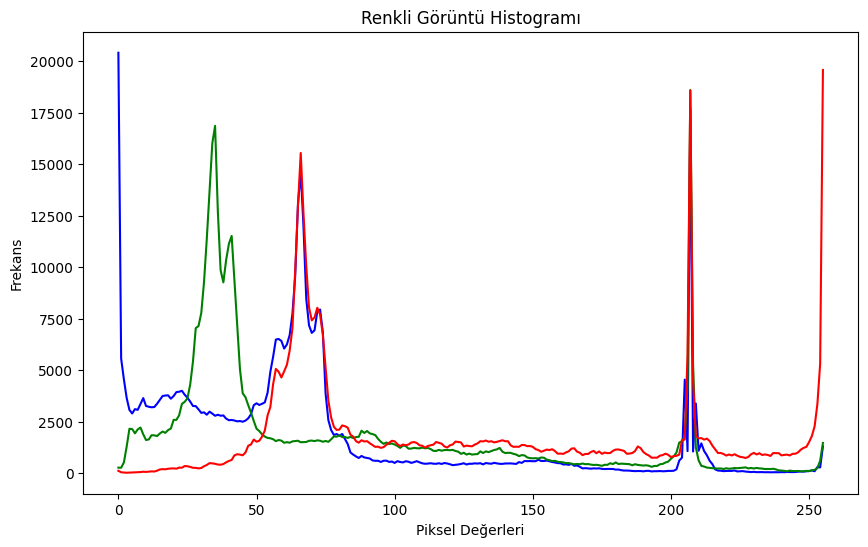

In [3]:
# Renkli görüntüyü yükleyin
image_color = cv2.imread("picture2.jpg")

# BGR kanalları için histogramları hesaplayın
colors = ('b', 'g', 'r')
plt.figure(figsize=(10, 6))

for i, color in enumerate(colors):
    histogram = cv2.calcHist([image_color], [i], None, [256], [0, 256])
    plt.plot(histogram, color=color)

plt.title("Renkli Görüntü Histogramı")
plt.xlabel("Piksel Değerleri")
plt.ylabel("Frekans")
plt.show()


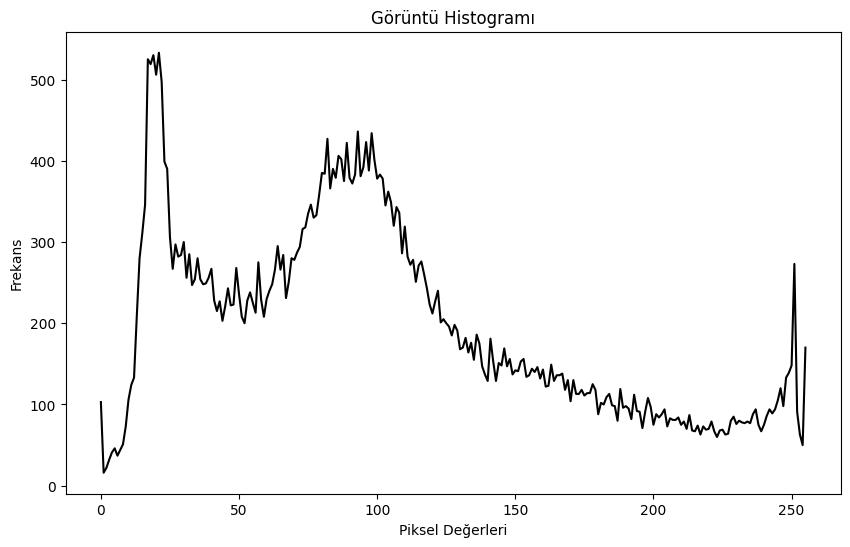

In [5]:
import cv2
import matplotlib.pyplot as plt

# Görüntüyü yükleyin (gri tonlamalı olarak)
image = cv2.imread("picture1.jpg", cv2.IMREAD_GRAYSCALE)

# Histogramı hesaplayın
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# Histogramı çizdirin
plt.figure(figsize=(10, 6))
plt.plot(histogram, color='black')
plt.title("Görüntü Histogramı")
plt.xlabel("Piksel Değerleri")
plt.ylabel("Frekans")
plt.show()


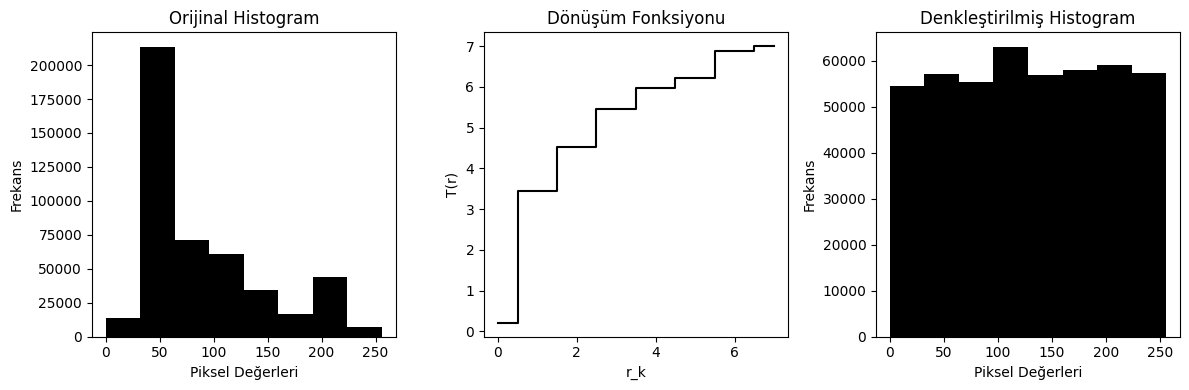

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Örnek 3 bitlik bir görüntü (8 seviyeli) oluşturma
# 8 seviyeli rastgele bir görüntü oluşturuyoruz
image = cv2.imread("picture2.jpg", cv2.IMREAD_GRAYSCALE)

# Orijinal görüntünün histogramını çizdirme
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(image.ravel(), bins=8, range=[0, 256], color='black')
plt.title("Orijinal Histogram")
plt.xlabel("Piksel Değerleri")
plt.ylabel("Frekans")

# Histogram denkleştirme uygulama
equalized_image = cv2.equalizeHist(image)

# Dönüşüm fonksiyonunu çizdirme
cdf = np.cumsum(cv2.calcHist([image], [0], None, [8], [0, 256]).ravel())
cdf_normalized = cdf * (7 / cdf.max())

plt.subplot(1, 3, 2)
plt.step(range(8), cdf_normalized, where='mid', color='black')
plt.title("Dönüşüm Fonksiyonu")
plt.xlabel("r_k")
plt.ylabel("T(r)")

# Denkleştirilmiş görüntünün histogramını çizdirme
plt.subplot(1, 3, 3)
plt.hist(equalized_image.ravel(), bins=8, range=[0, 256], color='black')
plt.title("Denkleştirilmiş Histogram")
plt.xlabel("Piksel Değerleri")
plt.ylabel("Frekans")

plt.tight_layout()
plt.show()
